In [1]:
!pip install ultralytics wandb opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import wandb

# Đăng nhập trực tiếp vào WandB bằng API key
wandb.login(key="c8767797aae76cbcd389ff29929ace1ac3021161")

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: doanngoccuong (doanngoccuong_nh). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\User\_netrc


True

In [8]:
import wandb
run = wandb.init()
artifact = run.use_artifact('doanngoccuong_nh/ThermalHumanDetect_YOLO/run_jidy5o7a_model:v0', type='model')
artifact_dir = artifact.download()

--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\logging\__init__.py", line 1163, in emit
    stream.write(msg + self.terminator)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeEncodeError: 'charmap' codec can't encode character '\u1ea2' in position 123: character maps to <undefined>
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Us

wandb:   1 of 1 files downloaded.  


In [9]:
from ultralytics import YOLO

# Khởi tạo mô hình từ file best.pt trong thư mục artifact
model = YOLO(f'{artifact_dir}/best.pt')

print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

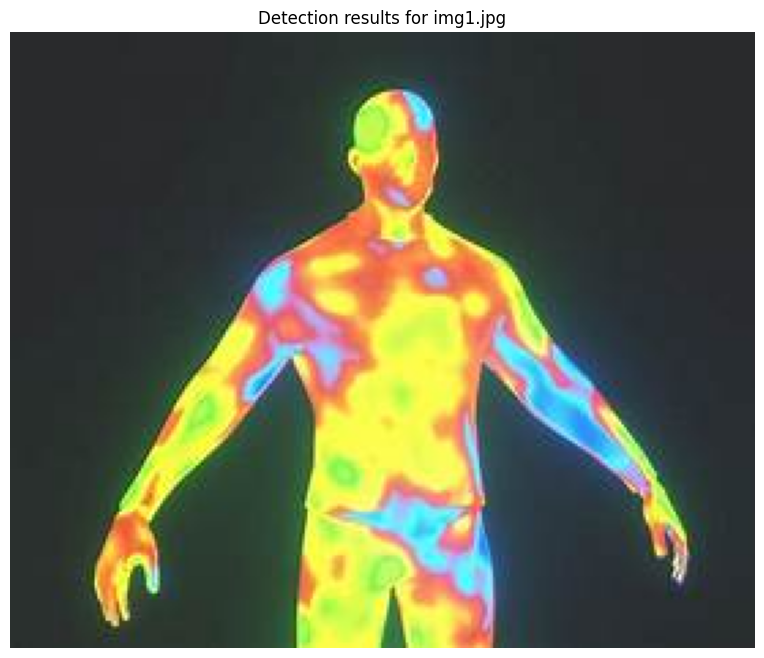

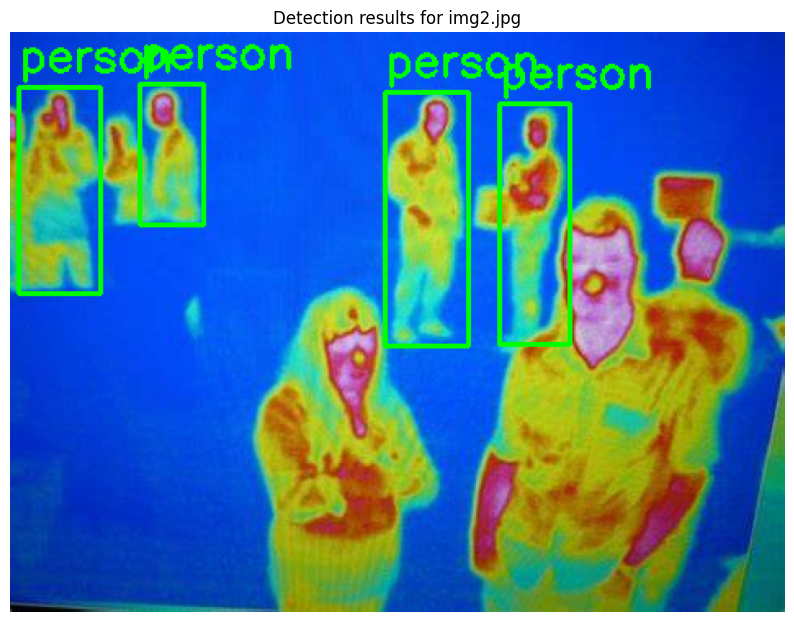

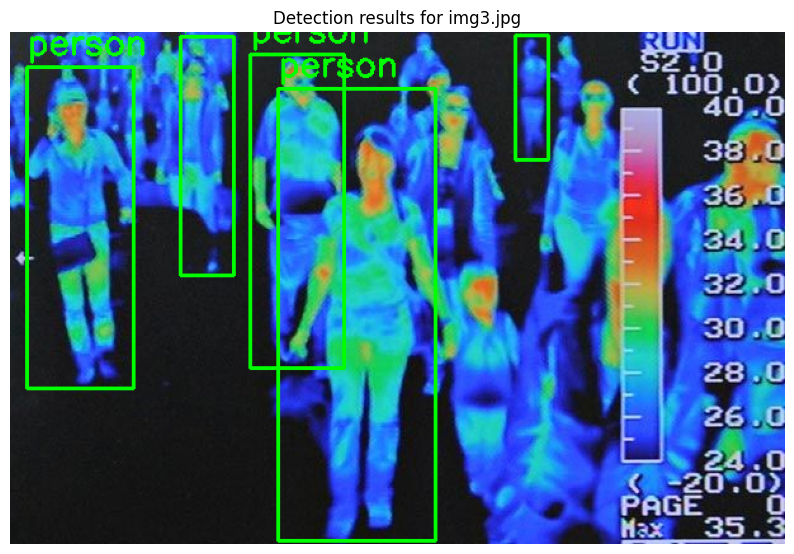

In [18]:
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO


# Function to run inference
def inference(image_path):
    # Read image from path
    cv_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
    # Convert from BGR to RGB for the model
    cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    
    # Run YOLO model on the image
    model_output = model(cv_image_rgb, conf=0.6, verbose=False)
    
    # Get bounding box coordinates and labels from the inference results
    detections = model_output[0].boxes.xyxy.cpu().numpy()  # Bounding box results
    labels = model_output[0].names  # Get labels
    
    # Return bounding boxes and labels
    return detections, labels

# Get all images from img_test directory
img_dir = './img_test'
image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Process each image
for image_file in image_files:
    image_path = os.path.join(img_dir, image_file)
    detections, labels = inference(image_path)
    
    # Read image
    image = cv2.imread(image_path)
    
    if image is not None:
        # Draw bounding boxes and labels
        for box in detections:
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, labels[0], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        
        # Convert and display image
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 8))
        plt.title(f'Detection results for {image_file}')
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not read image: {image_file}")
